# Automatic Feature Selection

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Univariate Statistics

In `univariate statistics`, we compute whether there is a **statistically significant relationship between each feature and the target**. 

Then the **features that are related with the highest confidence are selected**. 



In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

In [3]:
cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)

In [5]:
print(f"X_train.shape: {X_train.shape}")
print(f"X_train_selected.shape: {X_train_selected.shape}")

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


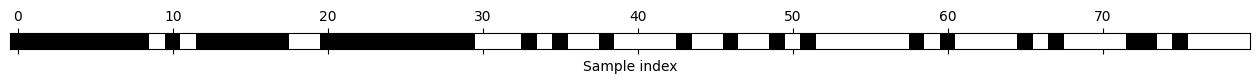

In [6]:
mask = select.get_support()
print(mask)

# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression

# transform test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression(solver="liblinear")
lr.fit(X_train, y_train)
print(f"Score with all features: {lr.score(X_test, y_test):.3f}")

lr.fit(X_train_selected, y_train)
print(f"Score with only selected features: {lr.score(X_test_selected, y_test):.3f}")

Score with all features: 0.930
Score with only selected features: 0.940


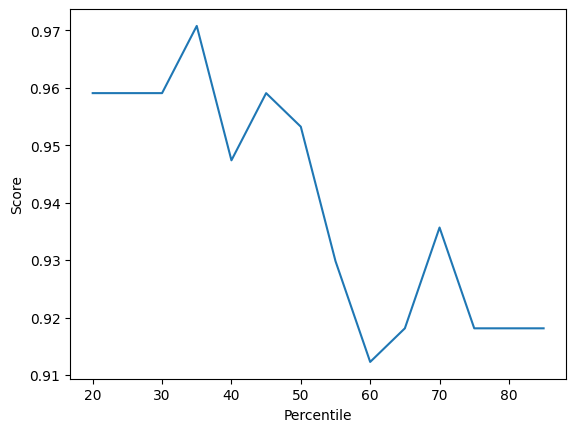

In [8]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.3)

scores = {}
percentiles = range(20, 90, 5)
 
for percentile in percentiles:
    select = SelectPercentile(percentile=percentile)
    select.fit(X_train, y_train)
    X_train_selected = select.transform(X_train)
    X_test_selected = select.transform(X_test)
    #print(f"X_train shape for {percentile}%: {X_train_selected.shape}")
    lr = LogisticRegression(solver="liblinear")
    lr.fit(X_train_selected, y_train)
    scores[percentile] = lr.score(X_test_selected, y_test)

plt.plot(scores.keys(), scores.values())
plt.ylabel("Score")
plt.xlabel("Percentile")
plt.show()

## Model-Based Feature Selection

`Model-based feature selection` uses a **supervised machine learning model to judge the importance of each feature, and keeps only the most important ones**. 



In [10]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")

In [11]:
# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)

print(f"X_train.shape: {X_train.shape}")
print(f"X_train_l1.shape: {X_train_l1.shape}")

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False  True False
 False False False False  True False False  True False  True  True False
 False False  True False False  True  True False False False False False
 False  True False False False False False False False  True False False
 False  True False False False False False False]


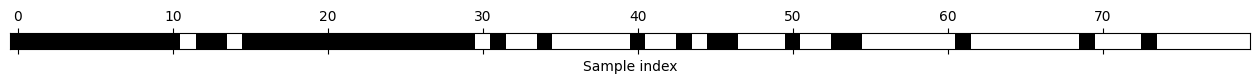

In [12]:
mask = select.get_support()
print(mask)
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())
plt.show()

In [13]:
X_test_l1 = select.transform(X_test)

score = LogisticRegression(solver="liblinear").fit(X_train_l1, y_train).score(X_test_l1, y_test)

print(f"Test score: {score:.3f}")

Test score: 0.951


## Iterative Feature Selection

In `iterative feature selection`, a **series of models are built, with varying numbers of features**. 



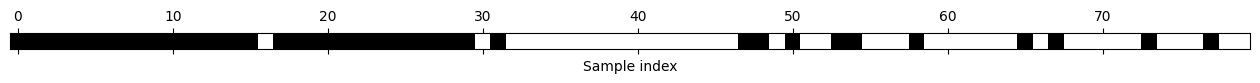

In [14]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)

# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())
plt.show()

In [15]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(solver="liblinear").fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print(f"Test score: {score:.3f}")

Test score: 0.951


In [16]:
print(f"Test score: {select.score(X_test, y_test):.3f}")

Test score: 0.951
